In [71]:
from binance.client import Client
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
api_key = 'haWzm6Ujj0SdpaCeCBiyyAvTvS78odvplgl4W9t29CVgSq5LrAHpt940JYQCt5TD'
secret_key = 'SgoyFqlJ6SvCYSXPFsU1ehPzQHhsfFV3Pa5scLF6y0stOO0aYXpfig6Fy4N0ePWX'
client = Client(api_key=api_key, api_secret=secret_key, tld='com')
account = client.get_account()

In [72]:

def get_history(symbol, interval, start, end=None):
    bars = client.get_historical_klines(
        symbol=symbol, interval=interval, start_str=start, end_str=end)
    df = pd.DataFrame(bars)
    df['Date'] = pd.to_datetime(df.iloc[:, 0], unit='ms')
    df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Clos Time', 'Quote Asset Volume',
                  'Number of Trades', 'Taker Buy Base Asset Volume', 'Taker Buy Quote Asset Volume', 'Ignore', 'Date']
    df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']].copy()
    df.set_index('Date', inplace=True)
    for column in df.columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    return df

timestamp = client._get_earliest_valid_timestamp(
    symbol='BTCUSDT', interval='1d')


data = get_history('BTCUSDT', '1h', timestamp)


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44196 entries, 2017-08-17 04:00:00 to 2022-09-06 22:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    44196 non-null  float64
 1   High    44196 non-null  float64
 2   Low     44196 non-null  float64
 3   Close   44196 non-null  float64
 4   Volume  44196 non-null  float64
dtypes: float64(5)
memory usage: 2.0 MB


In [74]:
data = data[["Close","Volume"]].copy()

In [75]:
data

,Close,Volume
Date,,
2017-08-17 04:00:00,4308.83,47.181009
2017-08-17 05:00:00,4315.32,23.234916
2017-08-17 06:00:00,4324.35,7.229691
2017-08-17 07:00:00,4349.99,4.443249
2017-08-17 08:00:00,4360.69,0.972807
...,...,...
2022-09-06 18:00:00,18958.66,18616.998750
2022-09-06 19:00:00,18824.41,18571.297770
2022-09-06 20:00:00,18982.41,17755.151990


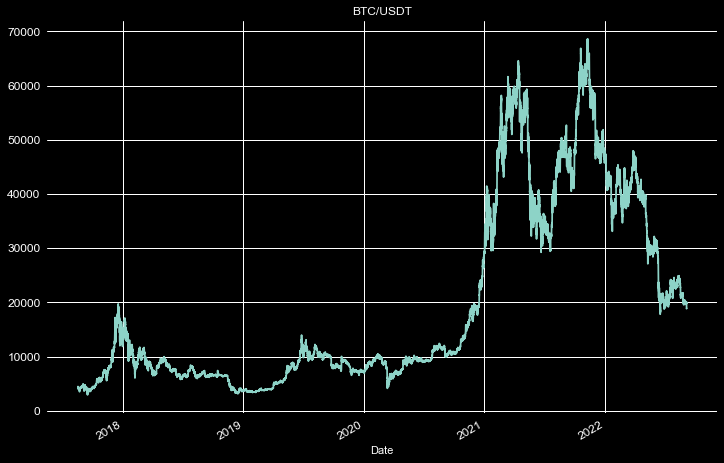

In [76]:
data.Close.plot(figsize = (12,8),title="BTC/USDT",fontsize=12)
plt.show()

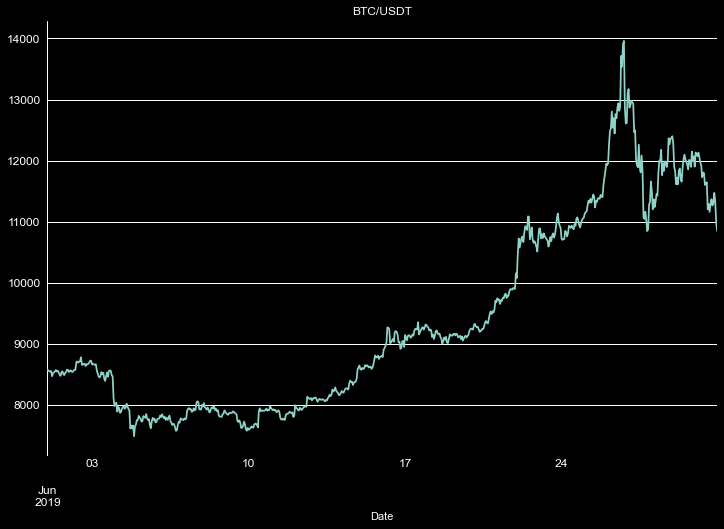

In [77]:
data.Close.loc['2019-06'].plot(figsize = (12,8),title="BTC/USDT",fontsize=12)
plt.show()

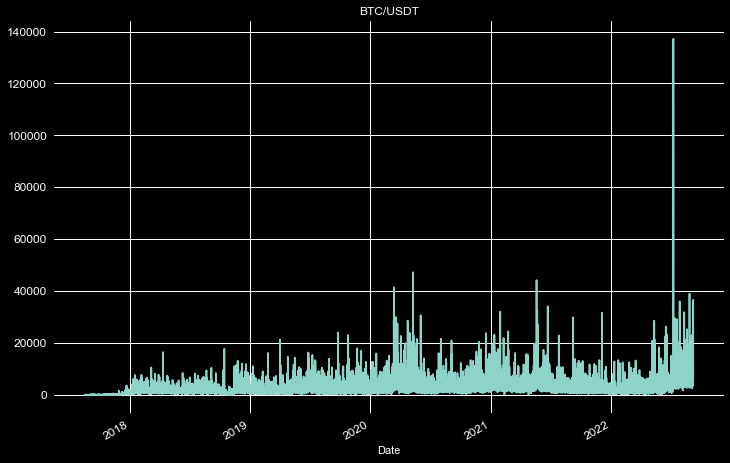

In [78]:
data.Volume.plot(figsize = (12,8),title="BTC/USDT",fontsize=12)
plt.show()

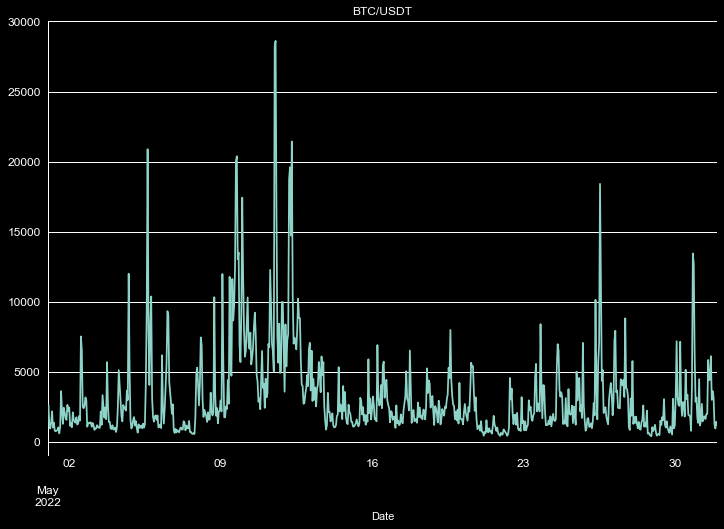

In [79]:
data.Volume.loc['2022-05'].plot(figsize = (12,8),title="BTC/USDT",fontsize=12)
plt.show()

In [80]:
data['returns'] = np.log(data.Close.div(data.Close.shift(1)))
data.describe()

,Close,Volume,returns
count,44196.000000,44196.000000,44195.000000
mean,19498.725149,2330.976263,0.000033
std,17248.049103,2615.931683,0.009270
min,2919.000000,0.000000,-0.201033
25%,7154.570000,956.126687,-0.003014
50%,10113.275000,1604.995594,0.000103
75%,33380.172500,2784.635732,0.003222
max,68633.690000,137207.188600,0.160280


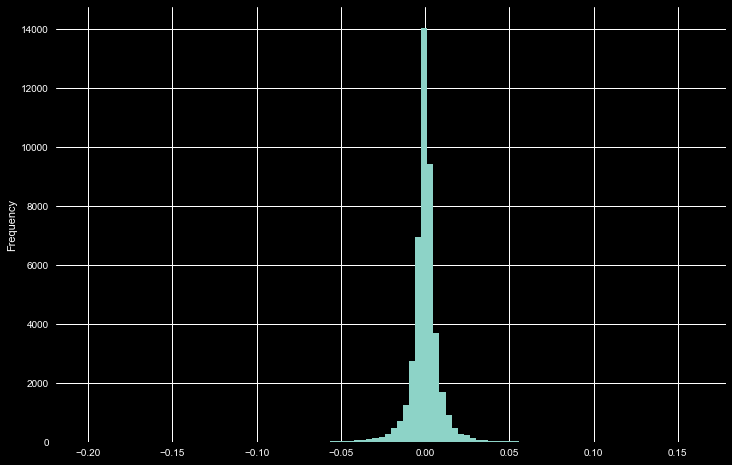

In [81]:
data.returns.plot(kind='hist',bins=100,figsize=(12,8))
plt.show()

In [82]:
data.returns.nlargest(10)

Date
2020-03-13 02:00:00    0.160280
2017-09-15 12:00:00    0.131731
2020-03-15 21:00:00    0.129546
2017-09-15 14:00:00    0.117777
2021-01-29 08:00:00    0.116145
2017-09-05 02:00:00    0.113257
2018-01-17 16:00:00    0.108790
2018-04-12 11:00:00    0.103325
2018-10-15 06:00:00    0.100727
2019-07-18 14:00:00    0.089576
Name: returns, dtype: float64

In [83]:
data.returns.nsmallest(10)

Date
2020-03-12 10:00:00   -0.201033
2020-03-12 23:00:00   -0.189707
2020-03-13 01:00:00   -0.119449
2017-12-28 02:00:00   -0.108097
2017-12-22 13:00:00   -0.107858
2017-09-05 01:00:00   -0.099818
2017-08-22 04:00:00   -0.098295
2020-03-15 22:00:00   -0.095180
2021-05-19 12:00:00   -0.093810
2019-09-24 18:00:00   -0.093730
Name: returns, dtype: float64

In [84]:
data.Close / data.Close[0]

Date
2017-08-17 04:00:00    1.000000
2017-08-17 05:00:00    1.001506
2017-08-17 06:00:00    1.003602
2017-08-17 07:00:00    1.009552
2017-08-17 08:00:00    1.012036
                         ...   
2022-09-06 18:00:00    4.399955
2022-09-06 19:00:00    4.368798
2022-09-06 20:00:00    4.405467
2022-09-06 21:00:00    4.404583
2022-09-06 22:00:00    4.384712
Name: Close, Length: 44196, dtype: float64

In [85]:
data.returns.sum()

1.4781240189511657

In [86]:
multiple = np.exp(data.returns.sum())
multiple

4.384712323298867

In [87]:
data['creturns'] = data.returns.cumsum().apply(np.exp)
data

,Close,Volume,returns,creturns
Date,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036
...,...,...,...,...
2022-09-06 18:00:00,18958.66,18616.998750,-0.007549,4.399955
2022-09-06 19:00:00,18824.41,18571.297770,-0.007106,4.368798
2022-09-06 20:00:00,18982.41,17755.151990,0.008358,4.405467


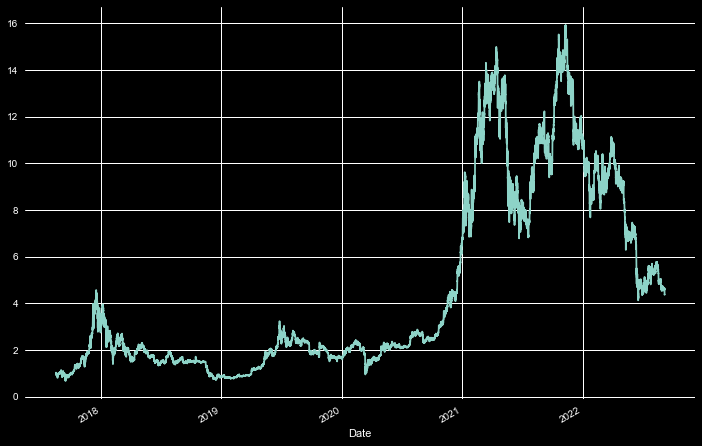

In [88]:
data.creturns.plot(figsize=(12,8))
plt.show()

In [89]:
mu = data.returns.mean()
mu

3.344550331374965e-05

In [90]:
std = data.returns.std()
std

0.009269790133859684

In [91]:
number_of_periods = 24 * 365.25
number_of_periods

8766.0

In [92]:
ann_mean = mu * number_of_periods
ann_mean

0.29318328204832944

In [93]:
ann_std = std * number_of_periods
ann_std

81.25898031341399

In [94]:
cagr = np.exp(ann_mean)
cagr

1.34068849204764

In [95]:
ann_mean / ann_std

0.0036080108428327355

In [96]:
cagr / ann_std

0.01649895786135435

In [97]:
data['vol_ch'] = np.log(data.Volume.div(data.Volume.shift(1)))
data

c:\Users\AndreyIchshenko\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Close,Volume,returns,creturns,vol_ch
Date,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955
...,...,...,...,...,...
2022-09-06 18:00:00,18958.66,18616.998750,-0.007549,4.399955,-0.676483
2022-09-06 19:00:00,18824.41,18571.297770,-0.007106,4.368798,-0.002458
2022-09-06 20:00:00,18982.41,17755.151990,0.008358,4.405467,-0.044942


In [98]:
data.vol_ch.nsmallest(20)

Date
2017-09-06 16:00:00        -inf
2019-06-07 21:00:00        -inf
2021-02-11 03:00:00        -inf
2021-04-25 04:00:00   -5.644090
2018-01-04 03:00:00   -5.428025
2019-06-07 20:00:00   -4.780619
2017-08-19 23:00:00   -3.801014
2017-08-20 09:00:00   -3.782857
2017-08-26 04:00:00   -3.470297
2017-12-04 06:00:00   -3.178488
2017-09-24 21:00:00   -2.749294
2017-08-21 09:00:00   -2.643555
2017-08-19 19:00:00   -2.357538
2020-06-09 01:00:00   -2.157645
2017-08-20 03:00:00   -2.106886
2018-10-06 03:00:00   -2.072737
2017-09-12 20:00:00   -1.948525
2019-10-13 21:00:00   -1.905406
2017-10-07 04:00:00   -1.901772
2022-06-01 21:00:00   -1.896834
Name: vol_ch, dtype: float64

In [99]:
data.vol_ch.nlargest(20)

Date
2017-09-06 23:00:00         inf
2019-06-07 22:00:00         inf
2021-02-11 05:00:00         inf
2018-01-04 05:00:00    5.256246
2021-04-25 08:00:00    5.051831
2017-08-20 00:00:00    3.794985
2017-08-26 05:00:00    3.428566
2022-03-27 20:00:00    2.949728
2017-08-20 11:00:00    2.904046
2017-10-12 00:00:00    2.884007
2017-12-04 07:00:00    2.851238
2019-07-27 10:00:00    2.808519
2017-08-20 15:00:00    2.779948
2022-07-08 14:00:00    2.674620
2019-12-16 18:00:00    2.658757
2017-08-20 05:00:00    2.585916
2019-09-06 17:00:00    2.579215
2018-04-12 11:00:00    2.562466
2020-06-10 18:00:00    2.537417
2018-10-15 05:00:00    2.525149
Name: vol_ch, dtype: float64

In [100]:
data.loc[data.vol_ch > 3, "vol_ch"] = np.nan
data.loc[data.vol_ch < -3, "vol_ch"] = np.nan

<AxesSubplot:ylabel='Frequency'>

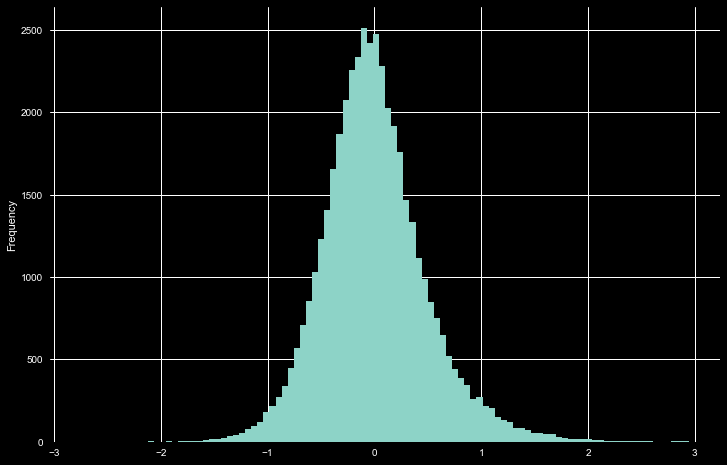

In [101]:
data.vol_ch.plot(kind='hist',bins=100,figsize=(12,8))

In [102]:
data

,Close,Volume,returns,creturns,vol_ch
Date,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955
...,...,...,...,...,...
2022-09-06 18:00:00,18958.66,18616.998750,-0.007549,4.399955,-0.676483
2022-09-06 19:00:00,18824.41,18571.297770,-0.007106,4.368798,-0.002458
2022-09-06 20:00:00,18982.41,17755.151990,0.008358,4.405467,-0.044942


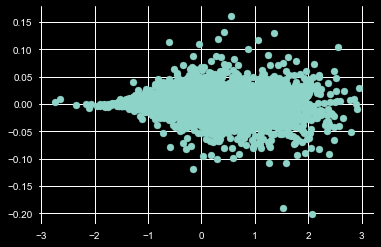

In [103]:
plt.scatter(x = data.vol_ch, y = data.returns)
plt.show()

In [104]:
pd.qcut(data.returns, q = 10)

Date
2017-08-17 04:00:00                      NaN
2017-08-17 05:00:00       (0.00117, 0.00243]
2017-08-17 06:00:00       (0.00117, 0.00243]
2017-08-17 07:00:00       (0.00428, 0.00793]
2017-08-17 08:00:00       (0.00243, 0.00428]
                               ...          
2022-09-06 18:00:00     (-0.00771, -0.00405]
2022-09-06 19:00:00     (-0.00771, -0.00405]
2022-09-06 20:00:00          (0.00793, 0.16]
2022-09-06 21:00:00    (-0.000982, 0.000103]
2022-09-06 22:00:00     (-0.00771, -0.00405]
Name: returns, Length: 44196, dtype: category
Categories (10, interval[float64, right]): [(-0.202, -0.00771] < (-0.00771, -0.00405] < (-0.00405, -0.00222] < (-0.00222, -0.000982] ... (0.00117, 0.00243] < (0.00243, 0.00428] < (0.00428, 0.00793] < (0.00793, 0.16]]

In [105]:
data['ret_cat'] = pd.qcut(data.returns, q = 10, labels = [-5, -4, -3, -2, -1, 1, 2, 3, 4, 5])
data

,Close,Volume,returns,creturns,vol_ch,ret_cat
Date,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,2
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3
...,...,...,...,...,...,...
2022-09-06 18:00:00,18958.66,18616.998750,-0.007549,4.399955,-0.676483,-4
2022-09-06 19:00:00,18824.41,18571.297770,-0.007106,4.368798,-0.002458,-4
2022-09-06 20:00:00,18982.41,17755.151990,0.008358,4.405467,-0.044942,5


In [106]:
data.ret_cat.value_counts()

-5    4420
-3    4420
-1    4420
3     4420
5     4420
-4    4419
-2    4419
1     4419
2     4419
4     4419
Name: ret_cat, dtype: int64

In [119]:
data['vol_cat'] = pd.qcut(data.vol_ch, q = 10, labels = [-5, -4, -3, -2, -1, 1, 2, 3, 4, 5])
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,volume_cat,vol_cat
Date,,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,-5
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,2,-5,-5
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,-4
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,-5
...,...,...,...,...,...,...,...,...
2022-09-06 18:00:00,18958.66,18616.998750,-0.007549,4.399955,-0.676483,-4,-5,-5
2022-09-06 19:00:00,18824.41,18571.297770,-0.007106,4.368798,-0.002458,-4,1,1
2022-09-06 20:00:00,18982.41,17755.151990,0.008358,4.405467,-0.044942,5,-1,-1


In [120]:
matrix = pd.crosstab(data.vol_cat,data.ret_cat)
matrix

ret_cat,-5,-4,-3,-2,-1,1,2,3,4,5
vol_cat,,,,,,,,,,
-5,178,357,456,487,546,588,579,524,444,259
-4,235,372,493,511,534,524,547,474,444,284
-3,238,367,486,545,541,560,517,475,413,276
-2,280,408,481,515,533,527,533,442,392,306
-1,271,414,502,516,515,507,482,458,428,325
1,339,469,456,505,483,498,422,464,417,365
2,393,486,438,447,442,459,421,467,451,413
3,487,476,457,391,399,380,427,448,477,476
4,696,580,387,334,298,247,310,396,546,624


In [121]:
import seaborn as sns

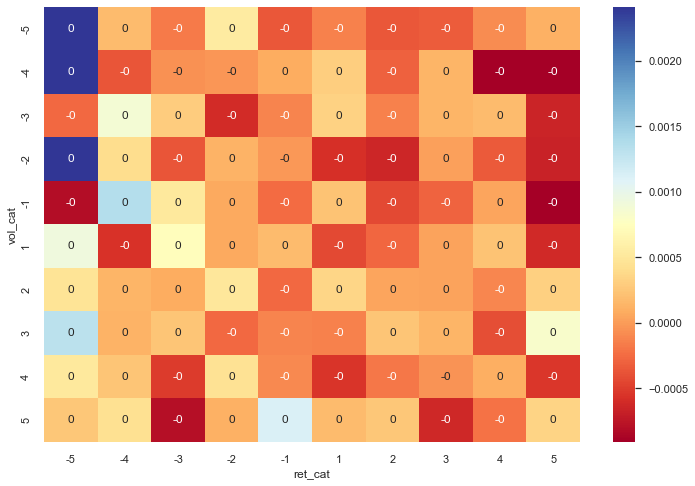

In [132]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1)
sns.heatmap(matrix, cmap="RdYlBu", annot=True, robust=True,fmt=".0f")
plt.show()

In [123]:
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,volume_cat,vol_cat
Date,,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,-5
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,2,-5,-5
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,-4
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,-5
...,...,...,...,...,...,...,...,...
2022-09-06 18:00:00,18958.66,18616.998750,-0.007549,4.399955,-0.676483,-4,-5,-5
2022-09-06 19:00:00,18824.41,18571.297770,-0.007106,4.368798,-0.002458,-4,1,1
2022-09-06 20:00:00,18982.41,17755.151990,0.008358,4.405467,-0.044942,5,-1,-1


In [124]:
data.vol_cat.shift()

Date
2017-08-17 04:00:00    NaN
2017-08-17 05:00:00    NaN
2017-08-17 06:00:00     -5
2017-08-17 07:00:00     -5
2017-08-17 08:00:00     -4
                      ... 
2022-09-06 18:00:00      5
2022-09-06 19:00:00     -5
2022-09-06 20:00:00      1
2022-09-06 21:00:00     -1
2022-09-06 22:00:00     -5
Name: vol_cat, Length: 44196, dtype: category
Categories (10, int64): [-5 < -4 < -3 < -2 ... 2 < 3 < 4 < 5]

In [128]:
matrix = pd.crosstab(data.vol_cat.shift(), data.ret_cat.shift(), values = data.returns, aggfunc = np.mean)
matrix

ret_cat,-5,-4,-3,-2,-1,1,2,3,4,5
vol_cat,,,,,,,,,,
-5,0.003518,0.000176,-0.000169,0.000535,-0.000363,-0.000142,-0.000359,-0.000337,-0.000079,0.000106
-4,0.002402,-0.000376,-0.000053,-0.000030,0.000078,0.000304,-0.000299,0.000131,-0.000907,-0.003524
-3,-0.000271,0.000873,0.000288,-0.000604,-0.000124,0.000329,-0.000141,0.000131,0.000172,-0.000652
-2,0.002925,0.000406,-0.000376,0.000120,-0.000013,-0.000577,-0.000636,0.000025,-0.000341,-0.000668
-1,-0.000808,0.001350,0.000517,0.000078,-0.000255,0.000233,-0.000435,-0.000290,0.000046,-0.000958
1,0.000928,-0.000568,0.000727,0.000075,0.000179,-0.000438,-0.000279,0.000029,0.000229,-0.000619
2,0.000466,0.000138,0.000087,0.000498,-0.000269,0.000353,0.000051,0.000037,-0.000108,0.000319
3,0.001318,0.000117,0.000241,-0.000266,-0.000124,-0.000138,0.000245,0.000141,-0.000405,0.000818
4,0.000508,0.000237,-0.000515,0.000445,-0.000096,-0.000552,-0.000187,-0.000051,0.000096,-0.000536


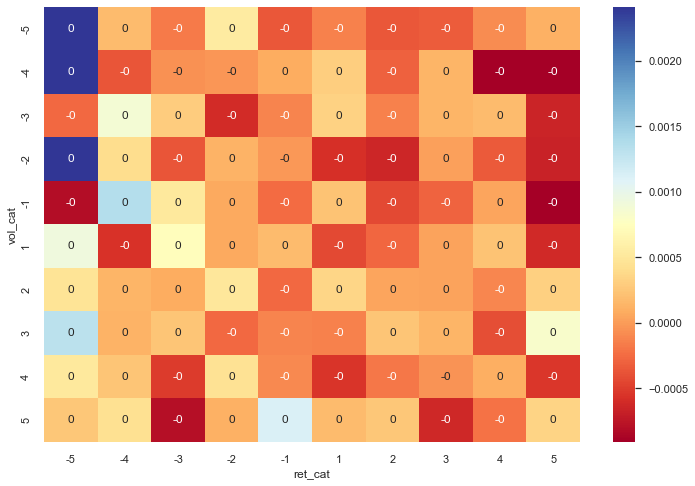

In [131]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1)
sns.heatmap(matrix, cmap="RdYlBu", annot=True, robust=True,fmt=".0f")
plt.show()

In [133]:
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,volume_cat,vol_cat
Date,,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,-5
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,2,-5,-5
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,-4
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,-5
...,...,...,...,...,...,...,...,...
2022-09-06 18:00:00,18958.66,18616.998750,-0.007549,4.399955,-0.676483,-4,-5,-5
2022-09-06 19:00:00,18824.41,18571.297770,-0.007106,4.368798,-0.002458,-4,1,1
2022-09-06 20:00:00,18982.41,17755.151990,0.008358,4.405467,-0.044942,5,-1,-1


In [134]:
data['position'] = 1 # Trading position - long for all bars
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,volume_cat,vol_cat,position
Date,,,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,NaN,1
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,-5,1
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,2,-5,-5,1
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,-4,1
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,-5,1
...,...,...,...,...,...,...,...,...,...
2022-09-06 18:00:00,18958.66,18616.998750,-0.007549,4.399955,-0.676483,-4,-5,-5,1
2022-09-06 19:00:00,18824.41,18571.297770,-0.007106,4.368798,-0.002458,-4,1,1,1
2022-09-06 20:00:00,18982.41,17755.151990,0.008358,4.405467,-0.044942,5,-1,-1,1


In [ ]:
# Sell and go Neutral if returns are very high and vol_ch is negative

In [135]:
return_thresh = np.percentile(data.returns.dropna(),90)
return_thresh

0.007927200912402961

In [136]:
cond1 = data.returns >= return_thresh
cond1

Date
2017-08-17 04:00:00    False
2017-08-17 05:00:00    False
2017-08-17 06:00:00    False
2017-08-17 07:00:00    False
2017-08-17 08:00:00    False
                       ...  
2022-09-06 18:00:00    False
2022-09-06 19:00:00    False
2022-09-06 20:00:00     True
2022-09-06 21:00:00    False
2022-09-06 22:00:00    False
Name: returns, Length: 44196, dtype: bool

In [137]:
volume_thresh = np.percentile(data.vol_ch.dropna(), [5,20])
volume_thresh

array([-0.73002341, -0.37633301])

In [138]:
cond2 = data.vol_ch.between(volume_thresh[0],volume_thresh[1])
cond2

Date
2017-08-17 04:00:00    False
2017-08-17 05:00:00     True
2017-08-17 06:00:00    False
2017-08-17 07:00:00     True
2017-08-17 08:00:00    False
                       ...  
2022-09-06 18:00:00     True
2022-09-06 19:00:00    False
2022-09-06 20:00:00    False
2022-09-06 21:00:00    False
2022-09-06 22:00:00    False
Name: vol_ch, Length: 44196, dtype: bool

In [140]:
data.loc[cond1 & cond2, "position"] = 0
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,volume_cat,vol_cat,position
Date,,,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,NaN,1
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,-5,1
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,2,-5,-5,1
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,-4,1
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,-5,1
...,...,...,...,...,...,...,...,...,...
2022-09-06 18:00:00,18958.66,18616.998750,-0.007549,4.399955,-0.676483,-4,-5,-5,1
2022-09-06 19:00:00,18824.41,18571.297770,-0.007106,4.368798,-0.002458,-4,1,1,1
2022-09-06 20:00:00,18982.41,17755.151990,0.008358,4.405467,-0.044942,5,-1,-1,1


In [141]:
data.position.value_counts()

1    43776
0      420
Name: position, dtype: int64

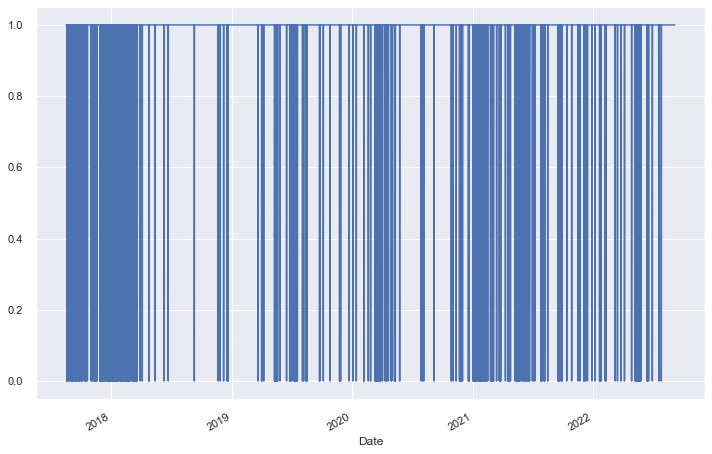

In [143]:
data.loc[:, "position"].plot(figsize=(12,8))
plt.show()

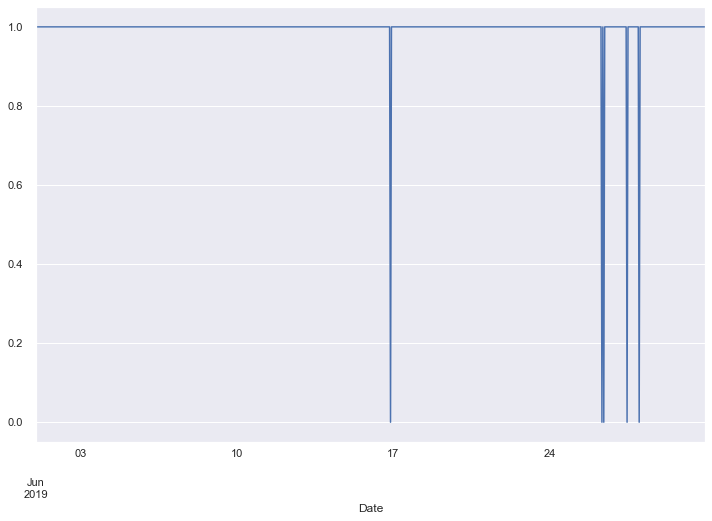

In [144]:
data.loc["2019-06", "position"].plot(figsize=(12,8))
plt.show()

In [146]:
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,volume_cat,vol_cat,position
Date,,,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,NaN,1
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,-5,1
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,2,-5,-5,1
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,-4,1
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,-5,1
...,...,...,...,...,...,...,...,...,...
2022-09-06 18:00:00,18958.66,18616.998750,-0.007549,4.399955,-0.676483,-4,-5,-5,1
2022-09-06 19:00:00,18824.41,18571.297770,-0.007106,4.368798,-0.002458,-4,1,1,1
2022-09-06 20:00:00,18982.41,17755.151990,0.008358,4.405467,-0.044942,5,-1,-1,1


In [148]:
data['strategy'] = data.position.shift(1) * data.returns
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,volume_cat,vol_cat,position,strategy
Date,,,,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,-5,1,0.001505
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,2,-5,-5,1,0.002090
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,-4,1,0.005912
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,-5,1,0.002457
...,...,...,...,...,...,...,...,...,...,...
2022-09-06 18:00:00,18958.66,18616.998750,-0.007549,4.399955,-0.676483,-4,-5,-5,1,-0.007549
2022-09-06 19:00:00,18824.41,18571.297770,-0.007106,4.368798,-0.002458,-4,1,1,1,-0.007106
2022-09-06 20:00:00,18982.41,17755.151990,0.008358,4.405467,-0.044942,5,-1,-1,1,0.008358


In [151]:
data[['returns','strategy']].sum().apply(np.exp) # multiple strat

returns      4.384712
strategy    11.999758
dtype: float64

In [153]:
data['cstrategy'] = data['strategy'].cumsum().apply(np.exp)

In [154]:
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,volume_cat,vol_cat,position,strategy,cstrategy
Date,,,,,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,-5,1,0.001505,1.001506
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,2,-5,-5,1,0.002090,1.003602
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,-4,1,0.005912,1.009552
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,-5,1,0.002457,1.012036
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-06 18:00:00,18958.66,18616.998750,-0.007549,4.399955,-0.676483,-4,-5,-5,1,-0.007549,12.041474
2022-09-06 19:00:00,18824.41,18571.297770,-0.007106,4.368798,-0.002458,-4,1,1,1,-0.007106,11.956206
2022-09-06 20:00:00,18982.41,17755.151990,0.008358,4.405467,-0.044942,5,-1,-1,1,0.008358,12.056559


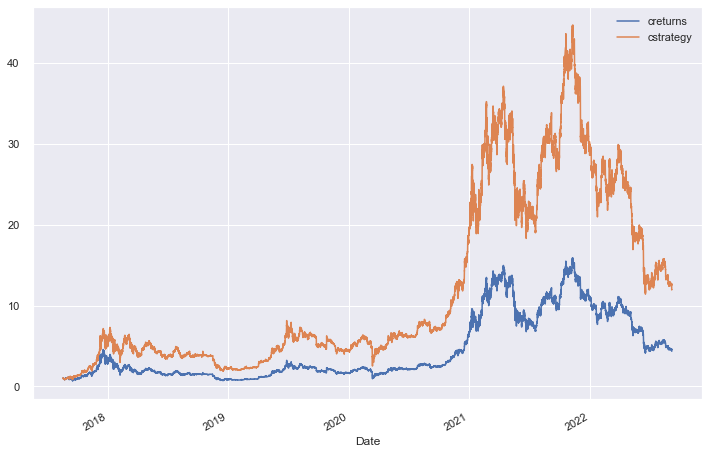

In [155]:
data[['creturns','cstrategy']].plot(figsize=(12,8))
plt.show()

In [156]:
tp_year = 24 * 365.25
tp_year

8766.0

In [157]:
ann_mean = data[['returns','strategy']].mean() * tp_year
ann_mean

returns     0.293183
strategy    0.492873
dtype: float64

In [158]:
ann_std = data[['returns','strategy']].std() * tp_year
ann_std

returns     81.25898
strategy    80.08327
dtype: float64

In [159]:
sharpe = (np.exp(ann_mean) - 1) / ann_std
sharpe

returns     0.004193
strategy    0.007954
dtype: float64

In [160]:
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,volume_cat,vol_cat,position,strategy,cstrategy
Date,,,,,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,-5,1,0.001505,1.001506
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,2,-5,-5,1,0.002090,1.003602
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,-4,1,0.005912,1.009552
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,-5,1,0.002457,1.012036
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-06 18:00:00,18958.66,18616.998750,-0.007549,4.399955,-0.676483,-4,-5,-5,1,-0.007549,12.041474
2022-09-06 19:00:00,18824.41,18571.297770,-0.007106,4.368798,-0.002458,-4,1,1,1,-0.007106,11.956206
2022-09-06 20:00:00,18982.41,17755.151990,0.008358,4.405467,-0.044942,5,-1,-1,1,0.008358,12.056559


In [161]:
data.position.value_counts()

1    43776
0      420
Name: position, dtype: int64

In [162]:
data.position.diff().fillna(0).abs() # absolute change in position

Date
2017-08-17 04:00:00    0.0
2017-08-17 05:00:00    0.0
2017-08-17 06:00:00    0.0
2017-08-17 07:00:00    0.0
2017-08-17 08:00:00    0.0
                      ... 
2022-09-06 18:00:00    0.0
2022-09-06 19:00:00    0.0
2022-09-06 20:00:00    0.0
2022-09-06 21:00:00    0.0
2022-09-06 22:00:00    0.0
Name: position, Length: 44196, dtype: float64

In [163]:
data['trades'] = data.position.diff().fillna(0).abs()

In [164]:
data.trades.value_counts()

0.0    43370
1.0      826
Name: trades, dtype: int64

In [166]:
comissions = 0.00075
comissions

0.00075

In [167]:
other = 0.0001
other

0.0001

In [168]:
#  total proportional trading costs (neg log return)
ptc = np.log(1 - comissions) + np.log(1 - other)
ptc

-0.0008502863910375247

In [178]:
data['strategy_net'] = data.strategy + data.trades * ptc

In [183]:
data['cstrategy_net'] = data.strategy_net.cumsum().apply(np.exp)

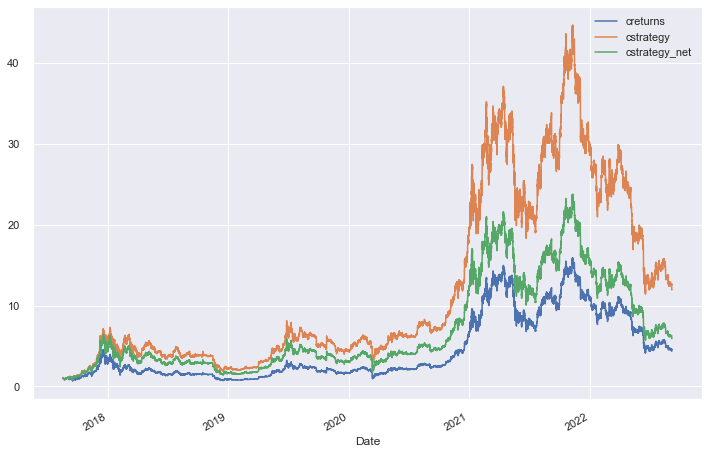

In [184]:
data[['creturns','cstrategy','cstrategy_net']].plot(figsize=(12,8))
plt.show()

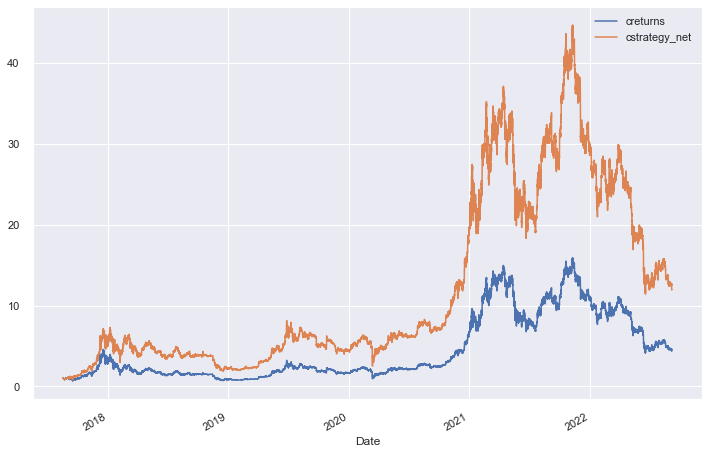

In [177]:
data[['creturns','cstrategy_net']].plot(figsize=(12,8))
plt.show()